<a href="https://colab.research.google.com/github/julianrojas19/julianrojas19.github.io/blob/main/PARCIAL_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial

Julian D. Rojas R.

Juan S. Sanchez C.

Santiago Rojas C. 

In [ ]:
import psycopg2 as ps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
!pip install squarify
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
host_name = 'database-usta.cuxqvtybmzzt.us-east-2.rds.amazonaws.com'
dbname = 'database-usta'
port = '5432'
username = 'postgres'
password = '1234ob5678'

In [ ]:
try:
  conn = ps.connect(host=host_name, 
            user=username, 
            password=password)
except ps.OperationalError as e:
  raise e
else:
  print('Connected')

Connected


In [ ]:
db_cursor = conn.cursor()

In [ ]:
df=pd.read_sql('SELECT * FROM turismo', con=conn)

In [ ]:
df

,id,sexo,edad,parentesco_jefe_hogar,viaje,motivo_viaje,monto_ultimo_viaje,leer_escribir,nivel_educativo,grado_alcanzado,diploma_obtenido,ingreso_mensual_aprox,num_noches,area
0,0,mujer,56,jefe_hogar,no,NULL,999999.0,si,basica_primaria,5,NULL,880000.0,999999,ANTIOQUIA
1,1,mujer,25,hijo,no,NULL,999999.0,si,media,11,bachiller,880000.0,999999,ANTIOQUIA
2,2,mujer,1,nieto,NULL,NULL,999999.0,NULL,NULL,999999,NULL,880000.0,999999,ANTIOQUIA
3,3,mujer,39,jefe_hogar,no,NULL,999999.0,si,basica_secundaria,9,NULL,860000.0,999999,ANTIOQUIA
4,4,mujer,14,hijo,no,NULL,999999.0,si,basica_secundaria,8,NULL,860000.0,999999,ANTIOQUIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46291,46291,mujer,16,hijo,no,NULL,999999.0,si,media,10,ninguno,3800000.0,999999,SAN ANDRES
46292,46292,mujer,76,otro_pariente,no,NULL,999999.0,si,basica_secundaria,6,NULL,3800000.0,999999,SAN ANDRES
46293,46293,hombre,61,jefe_hogar,si,visita_parientes,150000.0,si,media,11,bachiller,4000000.0,1,RISARALDA
46294,46294,mujer,60,pareja,si,visita_parientes,150000.0,si,superior_universitaria,7,postgrado,4000000.0,1,RISARALDA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46296 entries, 0 to 46295
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46296 non-null  int64  
 1   sexo                   46296 non-null  object 
 2   edad                   46296 non-null  int64  
 3   parentesco_jefe_hogar  46296 non-null  object 
 4   viaje                  46296 non-null  object 
 5   motivo_viaje           46296 non-null  object 
 6   monto_ultimo_viaje     46296 non-null  object 
 7   leer_escribir          46296 non-null  object 
 8   nivel_educativo        46296 non-null  object 
 9   grado_alcanzado        46296 non-null  int64  
 10  diploma_obtenido       46296 non-null  object 
 11  ingreso_mensual_aprox  46296 non-null  float64
 12  num_noches             46296 non-null  int64  
 13  area                   46296 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.9+ 

In [ ]:
df.isnull().sum()

id                       0
sexo                     0
edad                     0
parentesco_jefe_hogar    0
viaje                    0
motivo_viaje             0
monto_ultimo_viaje       0
leer_escribir            0
nivel_educativo          0
grado_alcanzado          0
diploma_obtenido         0
ingreso_mensual_aprox    0
num_noches               0
area                     0
dtype: int64

In [ ]:
cat = df.select_dtypes('object').columns
for col in cat:
  df[cat] = df[cat].astype('category')

In [ ]:
df1=df.replace({'no':0,'NULL':0, 'si':1})
df1

,id,sexo,edad,parentesco_jefe_hogar,viaje,motivo_viaje,monto_ultimo_viaje,leer_escribir,nivel_educativo,grado_alcanzado,diploma_obtenido,ingreso_mensual_aprox,num_noches,area
0,0,mujer,56,jefe_hogar,0,0,999999.0,1,basica_primaria,5,0,880000.0,999999,ANTIOQUIA
1,1,mujer,25,hijo,0,0,999999.0,1,media,11,bachiller,880000.0,999999,ANTIOQUIA
2,2,mujer,1,nieto,0,0,999999.0,0,0,999999,0,880000.0,999999,ANTIOQUIA
3,3,mujer,39,jefe_hogar,0,0,999999.0,1,basica_secundaria,9,0,860000.0,999999,ANTIOQUIA
4,4,mujer,14,hijo,0,0,999999.0,1,basica_secundaria,8,0,860000.0,999999,ANTIOQUIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46291,46291,mujer,16,hijo,0,0,999999.0,1,media,10,ninguno,3800000.0,999999,SAN ANDRES
46292,46292,mujer,76,otro_pariente,0,0,999999.0,1,basica_secundaria,6,0,3800000.0,999999,SAN ANDRES
46293,46293,hombre,61,jefe_hogar,1,visita_parientes,150000.0,1,media,11,bachiller,4000000.0,1,RISARALDA
46294,46294,mujer,60,pareja,1,visita_parientes,150000.0,1,superior_universitaria,7,postgrado,4000000.0,1,RISARALDA


In [ ]:
df1[df1["ingreso_mensual_aprox"]>20000000]

,id,sexo,edad,parentesco_jefe_hogar,viaje,motivo_viaje,monto_ultimo_viaje,leer_escribir,nivel_educativo,grado_alcanzado,diploma_obtenido,ingreso_mensual_aprox,num_noches,area
1808,1808,hombre,30,jefe_hogar,0,0,999999.0,1,basica_secundaria,7,0,20280000.0,999999,SANTANDER
1809,1809,mujer,29,pareja,0,0,999999.0,1,superior_universitaria,1,tecnico_tecnologo,20280000.0,999999,SANTANDER
1810,1810,hombre,0,hijo,0,0,999999.0,0,0,999999,0,20280000.0,999999,SANTANDER
12440,12440,hombre,53,jefe_hogar,1,recreación,6000000.0,1,superior_universitaria,14,postgrado,25000000.0,4,CAUCA
12441,12441,mujer,44,pareja,1,recreación,2000000.0,1,superior_universitaria,11,postgrado,25000000.0,4,CAUCA
12442,12442,hombre,7,hijo,0,0,999999.0,1,basica_primaria,1,0,25000000.0,999999,CAUCA
19564,19564,hombre,38,jefe_hogar,0,0,999999.0,1,superior_universitaria,11,postgrado,30000000.0,999999,ANTIOQUIA
19565,19565,mujer,36,pareja,0,0,999999.0,1,superior_universitaria,8,postgrado,30000000.0,999999,ANTIOQUIA
20772,20772,hombre,38,jefe_hogar,0,0,999999.0,1,superior_universitaria,6,postgrado,25000000.0,999999,ANTIOQUIA
20773,20773,mujer,38,pareja,0,0,999999.0,1,superior_universitaria,7,postgrado,25000000.0,999999,ANTIOQUIA


In [ ]:
df1.drop(['diploma_obtenido',"id"], axis=1)

,sexo,edad,parentesco_jefe_hogar,viaje,motivo_viaje,monto_ultimo_viaje,leer_escribir,nivel_educativo,grado_alcanzado,ingreso_mensual_aprox,num_noches,area
0,mujer,56,jefe_hogar,0,0,999999.0,1,basica_primaria,5,880000.0,999999,ANTIOQUIA
1,mujer,25,hijo,0,0,999999.0,1,media,11,880000.0,999999,ANTIOQUIA
2,mujer,1,nieto,0,0,999999.0,0,0,999999,880000.0,999999,ANTIOQUIA
3,mujer,39,jefe_hogar,0,0,999999.0,1,basica_secundaria,9,860000.0,999999,ANTIOQUIA
4,mujer,14,hijo,0,0,999999.0,1,basica_secundaria,8,860000.0,999999,ANTIOQUIA
...,...,...,...,...,...,...,...,...,...,...,...,...
46291,mujer,16,hijo,0,0,999999.0,1,media,10,3800000.0,999999,SAN ANDRES
46292,mujer,76,otro_pariente,0,0,999999.0,1,basica_secundaria,6,3800000.0,999999,SAN ANDRES
46293,hombre,61,jefe_hogar,1,visita_parientes,150000.0,1,media,11,4000000.0,1,RISARALDA
46294,mujer,60,pareja,1,visita_parientes,150000.0,1,superior_universitaria,7,4000000.0,1,RISARALDA


In [ ]:
df1.describe()          ## ignoraremos el num_noches debido a que las personas que no viajaron tienen como dato "999999"

,id,edad,viaje,leer_escribir,grado_alcanzado,ingreso_mensual_aprox,num_noches
count,46296.000000,46296.000000,46296.000000,46296.000000,46296.000000,4.629600e+04,46296.000000
mean,23147.500000,34.254104,0.086206,0.891956,39706.508338,1.653697e+06,916471.825600
std,13364.648368,21.702935,0.280671,0.310439,195256.732119,1.655009e+06,276679.379229
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.800000e+01,1.000000
25%,11573.750000,17.000000,0.000000,1.000000,2.000000,8.257500e+05,999999.000000
50%,23147.500000,31.000000,0.000000,1.000000,5.000000,1.200000e+06,999999.000000
75%,34721.250000,51.000000,0.000000,1.000000,11.000000,2.000000e+06,999999.000000
max,46295.000000,105.000000,1.000000,1.000000,999999.000000,3.000000e+07,999999.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46296 entries, 0 to 46295
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     46296 non-null  int64   
 1   sexo                   46296 non-null  category
 2   edad                   46296 non-null  int64   
 3   parentesco_jefe_hogar  46296 non-null  category
 4   viaje                  46296 non-null  int64   
 5   motivo_viaje           46296 non-null  object  
 6   monto_ultimo_viaje     46296 non-null  category
 7   leer_escribir          46296 non-null  int64   
 8   nivel_educativo        46296 non-null  object  
 9   grado_alcanzado        46296 non-null  int64   
 10  diploma_obtenido       46296 non-null  object  
 11  ingreso_mensual_aprox  46296 non-null  float64 
 12  num_noches             46296 non-null  int64   
 13  area                   46296 non-null  category
dtypes: category(4), float64(1), int64(6), 

In [ ]:
df1.corr()

,id,edad,viaje,leer_escribir,grado_alcanzado,ingreso_mensual_aprox,num_noches
id,1.000000,0.004885,-0.073737,0.004094,-0.007467,0.028596,0.071236
edad,0.004885,1.000000,0.063659,0.302286,-0.311252,0.050983,-0.061845
viaje,-0.073737,0.063659,1.000000,0.095991,-0.062451,0.148377,-0.982903
leer_escribir,0.004094,0.302286,0.095991,1.000000,-0.584204,0.054513,-0.094509
grado_alcanzado,-0.007467,-0.311252,-0.062451,-0.584204,1.000000,-0.012494,0.061383
ingreso_mensual_aprox,0.028596,0.050983,0.148377,0.054513,-0.012494,1.000000,-0.141054
num_noches,0.071236,-0.061845,-0.982903,-0.094509,0.061383,-0.141054,1.000000


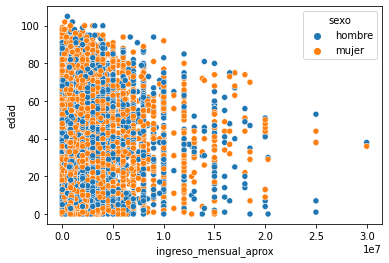

In [ ]:
sns.scatterplot(data=df, y='edad', x='ingreso_mensual_aprox', hue='sexo')

In [ ]:
corr = df1.corr()
corr[['viaje']].sort_values(by = 'viaje',ascending = False).style.background_gradient()

,viaje
viaje,1.000000
ingreso_mensual_aprox,0.148377
leer_escribir,0.095991
edad,0.063659
grado_alcanzado,-0.062451
id,-0.073737
num_noches,-0.982903


In [ ]:
dfa = df1["area"].value_counts()
dfa

ATLANTICO             2583
BOLIVAR               2577
CESAR                 2197
SUCRE                 2165
CORDOBA               2084
NORTE DE SANTANDER    2044
SANTANDER             2027
LA GUAJIRA            1998
QUINDIO               1953
MAGDALENA             1941
META                  1937
BOGOTA                1890
ANTIOQUIA             1867
RISARALDA             1799
TOLIMA                1795
CAUCA                 1781
CAQUETA               1773
BOYACA                1770
CHOCO                 1758
VALLE DEL CAUCA       1748
NARIÑO                1718
CALDAS                1701
HUILA                 1663
SAN ANDRES            1527
Name: area, dtype: int64

In [ ]:
dfa1=dfa.to_frame()
dfa1

,area
ATLANTICO,2583
BOLIVAR,2577
CESAR,2197
SUCRE,2165
CORDOBA,2084
NORTE DE SANTANDER,2044
SANTANDER,2027
LA GUAJIRA,1998
QUINDIO,1953
MAGDALENA,1941


In [ ]:
import squarify as sq

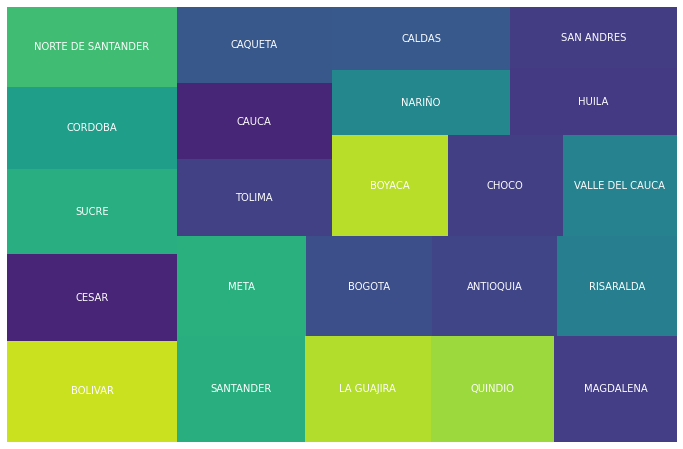

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sizes = dfa1.iloc[1:32].values
labels = dfa1.iloc[1:32].index
colors = sns.color_palette('flare')
sq.plot(sizes=sizes, label=labels, text_kwargs=dict(color='white'))
plt.axis('off')
plt.show()

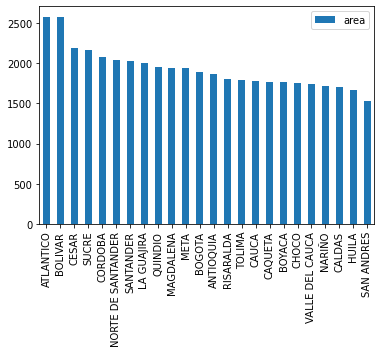

In [ ]:
dfa1.plot(kind='bar')

In [ ]:
df2=df[df['viaje'] == "si"]
df2

,id,sexo,edad,parentesco_jefe_hogar,viaje,motivo_viaje,monto_ultimo_viaje,leer_escribir,nivel_educativo,grado_alcanzado,diploma_obtenido,ingreso_mensual_aprox,num_noches,area
13,13,mujer,11,hijo,si,recreación,100000.0,si,basica_secundaria,0,NULL,850000.0,5,ANTIOQUIA
15,15,mujer,30,pareja,si,recreación,1100000.0,si,superior_universitaria,0,bachiller,1000000.0,5,ANTIOQUIA
16,16,mujer,15,hijo,si,recreación,900000.0,si,media,10,ninguno,1000000.0,5,ANTIOQUIA
17,17,hombre,12,hijo,si,recreación,900000.0,si,basica_primaria,4,NULL,1000000.0,5,ANTIOQUIA
20,20,mujer,55,jefe_hogar,si,visita_parientes,50000.0,no,ninguno,0,NULL,557000.0,7,ANTIOQUIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46261,46261,hombre,49,jefe_hogar,si,negocios,98.0,si,media,11,bachiller,2000000.0,16,BOLIVAR
46286,46286,mujer,68,pareja,si,recreación,50000.0,si,superior_universitaria,6,universitario,5000000.0,2,SUCRE
46293,46293,hombre,61,jefe_hogar,si,visita_parientes,150000.0,si,media,11,bachiller,4000000.0,1,RISARALDA
46294,46294,mujer,60,pareja,si,visita_parientes,150000.0,si,superior_universitaria,7,postgrado,4000000.0,1,RISARALDA


In [ ]:
cat = df1.select_dtypes('object').columns
for col in cat:
  df1[cat] = df2[cat].astype('category')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 13 to 46295
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     3991 non-null   int64   
 1   sexo                   3991 non-null   category
 2   edad                   3991 non-null   int64   
 3   parentesco_jefe_hogar  3991 non-null   category
 4   viaje                  3991 non-null   category
 5   motivo_viaje           3991 non-null   category
 6   monto_ultimo_viaje     3991 non-null   category
 7   leer_escribir          3991 non-null   category
 8   nivel_educativo        3991 non-null   category
 9   grado_alcanzado        3991 non-null   int64   
 10  diploma_obtenido       3991 non-null   category
 11  ingreso_mensual_aprox  3991 non-null   float64 
 12  num_noches             3991 non-null   int64   
 13  area                   3991 non-null   category
dtypes: category(9), float64(1), int64(4)
m

In [ ]:
dfv = df2.filter(["sexo","edad","viaje","host_name","monto_ultimo_viaje","ingreso_mensual_aprox"])
dfv

,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox
13,mujer,11,si,100000.0,850000.0
15,mujer,30,si,1100000.0,1000000.0
16,mujer,15,si,900000.0,1000000.0
17,hombre,12,si,900000.0,1000000.0
20,mujer,55,si,50000.0,557000.0
...,...,...,...,...,...
46261,hombre,49,si,98.0,2000000.0
46286,mujer,68,si,50000.0,5000000.0
46293,hombre,61,si,150000.0,4000000.0
46294,mujer,60,si,150000.0,4000000.0


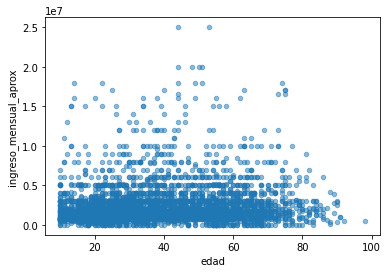

In [ ]:
var = 'edad'
data = pd.concat([dfv['ingreso_mensual_aprox'], dfv[var]], axis=1)
data.plot.scatter(x=var, y='ingreso_mensual_aprox', alpha = 0.5)

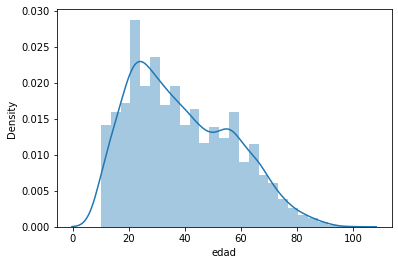

In [ ]:
sns.distplot(dfv['edad']);

In [ ]:
dfv["ingreso_mensual_aprox"].describe()

count    3.991000e+03
mean     2.453194e+06
std      2.508382e+06
min      9.800000e+01
25%      1.000000e+06
50%      1.800000e+06
75%      3.000000e+06
max      2.500000e+07
Name: ingreso_mensual_aprox, dtype: float64

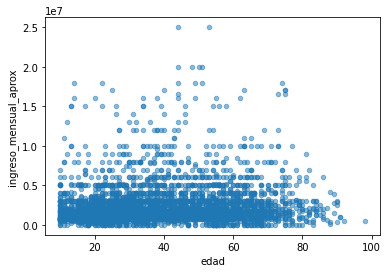

In [ ]:
var = 'edad'
data = pd.concat([dfv['ingreso_mensual_aprox'], dfv[var]], axis=1)
data.plot.scatter(x=var, y='ingreso_mensual_aprox', alpha = 0.5)

In [ ]:
dfv[dfv["ingreso_mensual_aprox"]>15000000]

,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox
1317,hombre,75,si,200000.0,17000000.0
1318,mujer,75,si,0.0,17000000.0
10655,hombre,55,si,550000.0,16000000.0
10656,mujer,44,si,98.0,16000000.0
10657,hombre,20,si,98.0,16000000.0
10658,hombre,14,si,98.0,16000000.0
10703,hombre,51,si,300000.0,18000000.0
10704,mujer,49,si,98.0,18000000.0
10705,mujer,22,si,98.0,18000000.0
10706,hombre,14,si,98.0,18000000.0


In [ ]:
dfv

,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox
13,mujer,11,si,100000.0,850000.0
15,mujer,30,si,1100000.0,1000000.0
16,mujer,15,si,900000.0,1000000.0
17,hombre,12,si,900000.0,1000000.0
20,mujer,55,si,50000.0,557000.0
...,...,...,...,...,...
46261,hombre,49,si,98.0,2000000.0
46286,mujer,68,si,50000.0,5000000.0
46293,hombre,61,si,150000.0,4000000.0
46294,mujer,60,si,150000.0,4000000.0


In [ ]:
dfv[dfv["sexo"]== "NULL"]

,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox


In [ ]:
dfv[dfv["edad"]== "NULL"]


,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox


In [ ]:
dfv[dfv["viaje"]== "NULL"]


,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox


In [ ]:
dfv[dfv["monto_ultimo_viaje"]== "NULL"]


,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox


In [ ]:
dfv[dfv["ingreso_mensual_aprox"]== "NULL"]


,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox


In [ ]:
dfv.duplicated().sum()

117

In [ ]:
dfv.drop_duplicates(inplace=True)
dfv.duplicated().sum()

0

In [ ]:
dfv.describe()

,edad,ingreso_mensual_aprox
count,3874.000000,3.874000e+03
mean,38.990191,2.471636e+06
std,18.131784,2.537514e+06
min,10.000000,9.800000e+01
25%,24.000000,1.000000e+06
50%,36.000000,1.800000e+06
75%,53.000000,3.000000e+06
max,98.000000,2.500000e+07


In [ ]:
dfv

,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox
13,mujer,11,si,100000.0,850000.0
15,mujer,30,si,1100000.0,1000000.0
16,mujer,15,si,900000.0,1000000.0
17,hombre,12,si,900000.0,1000000.0
20,mujer,55,si,50000.0,557000.0
...,...,...,...,...,...
46261,hombre,49,si,98.0,2000000.0
46286,mujer,68,si,50000.0,5000000.0
46293,hombre,61,si,150000.0,4000000.0
46294,mujer,60,si,150000.0,4000000.0


In [ ]:
dfv=dfv.replace({'mujer':0, 'hombre':1})
dfv


,sexo,edad,viaje,monto_ultimo_viaje,ingreso_mensual_aprox
13,0,11,1,100000.0,850000.0
15,0,30,1,1100000.0,1000000.0
16,0,15,1,900000.0,1000000.0
17,1,12,1,900000.0,1000000.0
20,0,55,1,50000.0,557000.0
...,...,...,...,...,...
46261,1,49,1,98.0,2000000.0
46286,0,68,1,50000.0,5000000.0
46293,1,61,1,150000.0,4000000.0
46294,0,60,1,150000.0,4000000.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

In [ ]:
X = dfv.filter(['ingreso_mensual_aprox ','monto_ultimo_viaje','edad'])
y = dfv

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
y_pred = reg_tree.predict(X_test)
y_fit_train = reg_tree.predict(X_train)

In [ ]:
def metricas(y_true, y_pred):
  print(f'MSE: {mean_squared_error(y_true, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE: {np.sqrt(mean_squared_error(y_true,y_pred))}')

In [ ]:
print('Métricas del entrenamiento',end='\n')
print('---'*10)
metricas(y_train, y_fit_train)
print('---'*10)
print('Métricas del testeo')
print('---'*10)
metricas(y_test, y_pred)

Métricas del entrenamiento
------------------------------
MSE: 1188083034535.301
MAE: 324074.8459799002
RMSE: 1089992.2176489616
------------------------------
Métricas del testeo
------------------------------
MSE: 1132175566589.3706
MAE: 324287.01507060276
RMSE: 1064037.3896576052


[Text(0.5, 0.9, 'X[0] <= 1720000.0\nsquared_error = 1490013863070.439\nsamples = 3099\nvalue = [[0.455]\n[39.223]\n[1.0]\n[493949.772]\n[2496241.022]]'),
 Text(0.25, 0.7, 'X[0] <= 534000.0\nsquared_error = 1152489119933.824\nsamples = 2938\nvalue = [[0.446]\n[38.863]\n[1.0]\n[323806.448]\n[2373458.35]]'),
 Text(0.125, 0.5, 'X[0] <= 25049.5\nsquared_error = 1018400686865.548\nsamples = 2336\nvalue = [[0.429]\n[38.651]\n[1.0]\n[164557.219]\n[2203950.954]]'),
 Text(0.0625, 0.3, 'X[0] <= 49.0\nsquared_error = 1630160189761.52\nsamples = 498\nvalue = [[0.333]\n[34.847]\n[1.0]\n[66.795]\n[2608799.779]]'),
 Text(0.03125, 0.1, 'squared_error = 936466168401.547\nsamples = 159\nvalue = [[0.308]\n[30.799]\n[1.0]\n[0.0]\n[2029067.83]]'),
 Text(0.09375, 0.1, 'squared_error = 1909207182345.83\nsamples = 339\nvalue = [[0.345]\n[36.746]\n[1.0]\n[98.124]\n[2880709.454]]'),
 Text(0.1875, 0.3, 'X[0] <= 284000.0\nsquared_error = 839494751813.198\nsamples = 1838\nvalue = [[0.455]\n[39.682]\n[1.0]\n[209125.

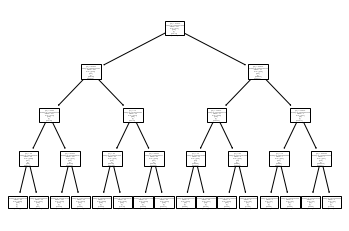

In [ ]:
from sklearn import tree

tree.plot_tree(reg_tree)